<a href="https://colab.research.google.com/github/madanjha/PythonDS/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('bank-additional-full_final (3).csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# **the above dataset consists of past customers data that has been given by bank.Now bank officials wants to launch a new scheme and based on the past data we have to predict wether a person is gonna be intresetd in the scheme or not**

In [ ]:
# EDA --> Explory Data Analysis
# 1.null Values
# 2.Duplicates
# 3.outliers
# 4.Label Encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
#as the null values are very less we will drop it
#df.dropna(inplace=True)
#df.columns
for col in df.columns:
  if(df[col].dtype!='object'):
    df[col].fillna(df[col].mean(),inplace =True)
  else:
    df[col].fillna(df[col].mode(),inplace =True)

<ipython-input-68-78c9d437f6bc>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace =True)
<ipython-input-68-78c9d437f6bc>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
#2.duplicate values
df.duplicated().sum()

1784

In [ ]:
df.drop_duplicates(inplace =True)

In [ ]:
df.duplicated().sum()

0

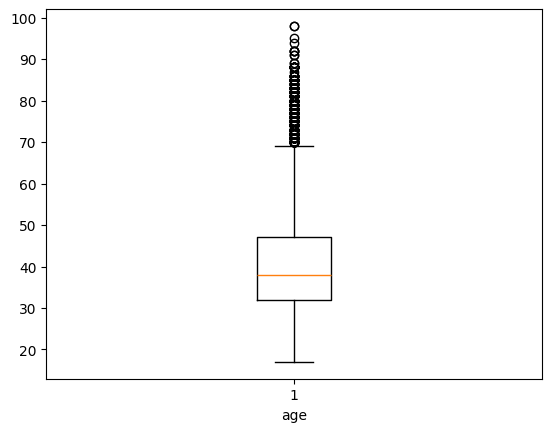

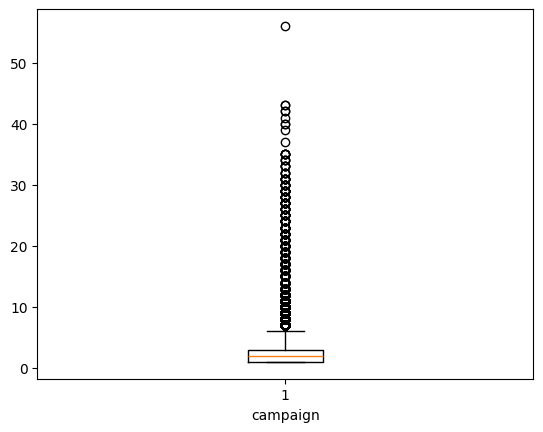

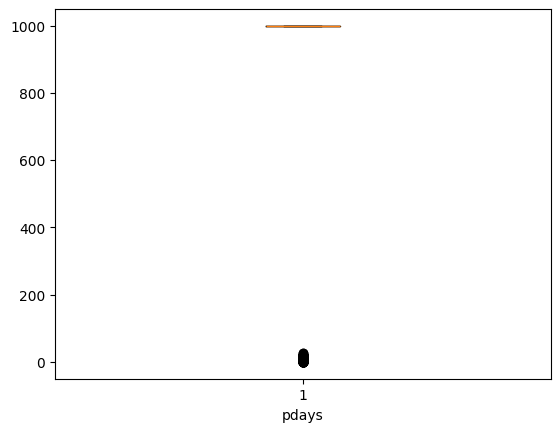

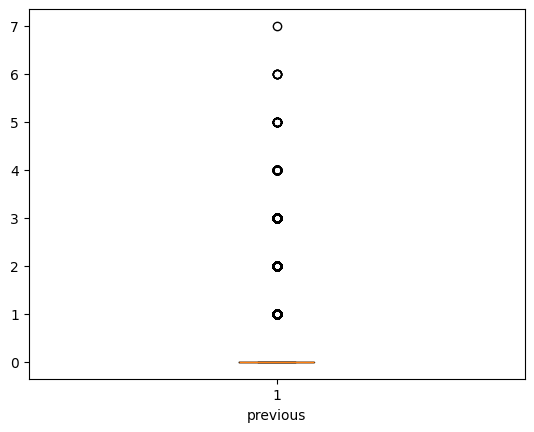

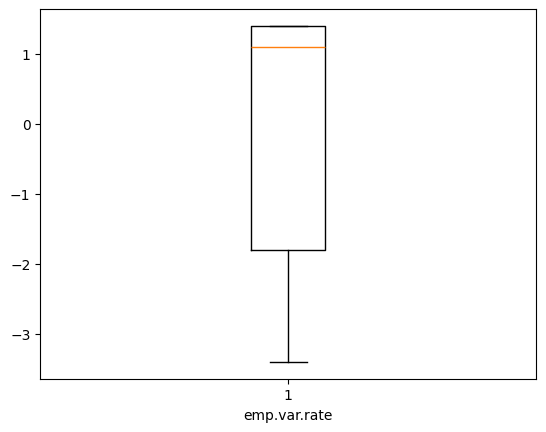

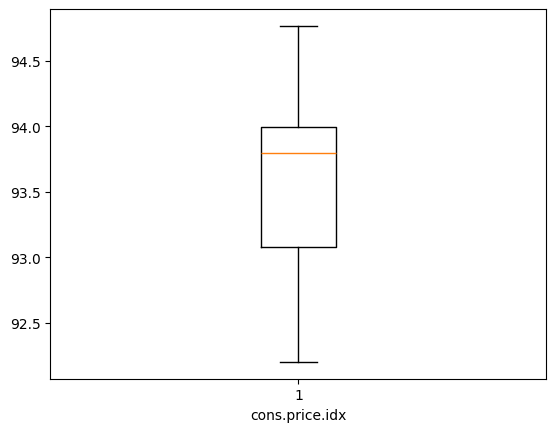

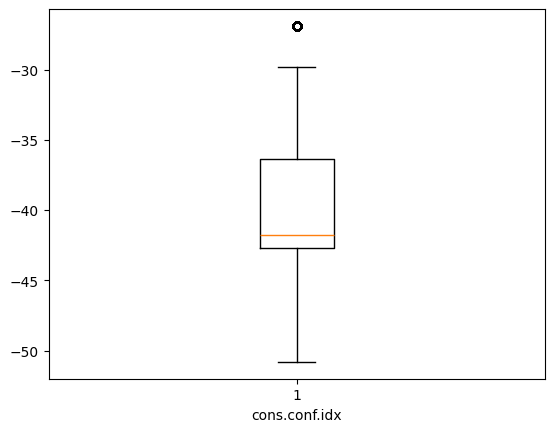

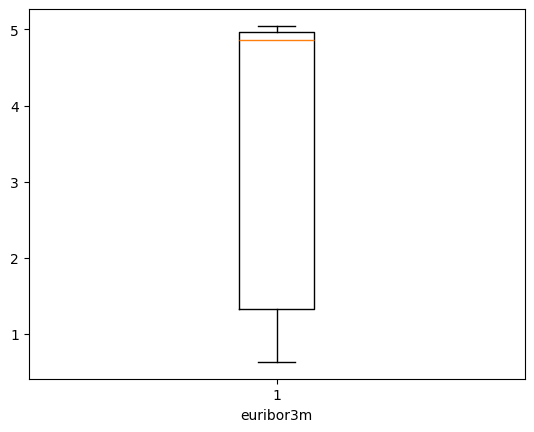

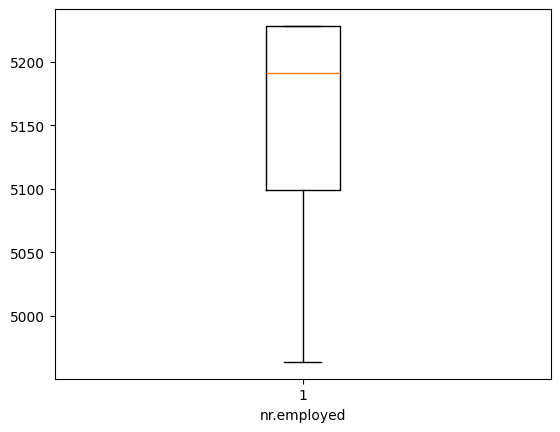

In [ ]:
#3.outliers
for col in df.columns:
  if (df[col].dtype!='object'):
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

In [ ]:
out_col=['campaign']
q1=df['campaign'].quantile(0.25)
q3=df['campaign'].quantile(0.75)

IQR=q3-q1

LB=q1-1.5*(IQR)
UB=q3+1.5*(IQR)

df=df[(df['campaign']>=LB) & (df['campaign']<=UB)]

In [ ]:
def outlierelimination(out_ele,df):
  for col in out_ele:

    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=  Q3-Q1

    LB=Q3-1.5*(IQR)
    UB=Q1+1.5*(IQR)

    df=df[(df[col]>=LB) & (df[col]<=UB)]





In [ ]:
outlierelimination(out_col,df)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le =LabelEncoder()
for col in df.columns:
  if(df[col].dtype=='object'):
    df[col]=le.fit_transform(df[col])


<ipython-input-80-50ddb153e540>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=le.fit_transform(df[col])
<ipython-input-80-50ddb153e540>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=le.fit_transform(df[col])
<ipython-input-80-50ddb153e540>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37006 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37006 non-null  int64  
 1   job             37006 non-null  int64  
 2   marital         37006 non-null  int64  
 3   education       37006 non-null  int64  
 4   default         37006 non-null  int64  
 5   housing         37006 non-null  int64  
 6   loan            37006 non-null  int64  
 7   contact         37006 non-null  int64  
 8   month           37006 non-null  int64  
 9   day_of_week     37006 non-null  int64  
 10  campaign        37006 non-null  int64  
 11  pdays           37006 non-null  int64  
 12  previous        37006 non-null  int64  
 13  poutcome        37006 non-null  int64  
 14  emp.var.rate    37006 non-null  float64
 15  cons.price.idx  37006 non-null  float64
 16  cons.conf.idx   37006 non-null  float64
 17  euribor3m       37006 non-null  floa

In [ ]:
# Model Building
#1.splitting the data in terms of x nad y
#2.splitting in training and testing
#3.model initilizing
#4.fit or train the model
#5.predictions
#6.evaluate the model


In [ ]:
x=df.iloc[:,:-1]
y=df['y']

In [ ]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,0,2,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [ ]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,stratify=y)



In [ ]:
x_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12975,29,7,1,3,0,2,0,0,3,3,4,999,0,1,1.4,93.918,-42.7,4.962,5228.1
38982,25,0,2,6,0,0,0,0,2,0,2,4,1,2,-3.0,92.713,-33.0,0.718,5023.5
29828,31,0,2,6,0,2,2,0,0,1,5,999,1,0,-1.8,93.075,-47.1,1.405,5099.1
30258,56,2,1,6,0,2,0,0,0,2,1,999,0,1,-1.8,93.075,-47.1,1.365,5099.1
10723,43,9,1,5,0,2,0,1,4,3,2,999,0,1,1.4,94.465,-41.8,4.961,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,44,9,0,5,0,2,0,0,6,2,3,999,0,1,-1.8,92.893,-46.2,1.327,5099.1
14256,47,4,1,0,0,2,0,0,3,1,3,999,0,1,1.4,93.918,-42.7,4.962,5228.1
180,34,9,1,3,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
11381,50,9,1,1,0,2,0,1,4,0,2,999,0,1,1.4,94.465,-41.8,4.959,5228.1


In [ ]:
y_train

,y
37428,0
40366,1
5191,0
4830,0
21550,0
...,...
12827,0
19250,0
35053,0
20056,0


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
y_test

,y
12975,0
38982,0
29828,1
30258,0
10723,0
...,...
31957,0
14256,0
180,0
11381,0


In [ ]:
from sklearn.metrics import *

In [ ]:
accuracy_score(y_test,y_pred)*100

88.92091515042335

In [ ]:
mat=confusion_matrix(y_test,y_pred)
mat

array([[9614,  142],
       [1088,  258]])

<Axes: >

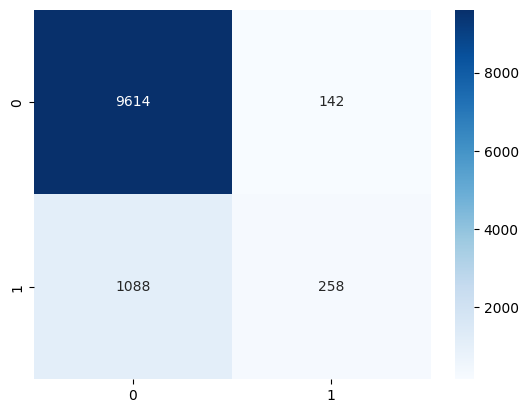

In [ ]:
sns.heatmap(mat,annot=True,fmt="d",cmap='Blues')

In [ ]:
#dataset is not balanced and the data is more dominent towards out 0
(9614+258)/(9614+142+1088+258)

0.8892091515042335

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      9756
           1       0.65      0.19      0.30      1346

    accuracy                           0.89     11102
   macro avg       0.77      0.59      0.62     11102
weighted avg       0.87      0.89      0.86     11102

